In [0]:
# Initialize Spark session
spark = SparkSession.builder.appName("DynamicPricingModel").getOrCreate()


# Load dataset as a table
df = spark.table("likhitha1.default.travel_transportation_dataset")

# Show schema and sample
df.printSchema()
display(df)

root
 |-- ride_id: long (nullable = true)
 |-- ride_datetime: timestamp (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- drop_location: string (nullable = true)
 |-- distance_km: double (nullable = true)
 |-- ride_duration_min: double (nullable = true)
 |-- base_fare: double (nullable = true)
 |-- demand_level: string (nullable = true)
 |-- weather: string (nullable = true)
 |-- event_nearby: string (nullable = true)
 |-- traffic_level: string (nullable = true)
 |-- driver_id: long (nullable = true)
 |-- rider_id: long (nullable = true)
 |-- driver_rating: double (nullable = true)
 |-- rider_rating: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- ride_status: string (nullable = true)
 |-- total_fare: double (nullable = true)
 |-- is_fraudulent: long (nullable = true)
 |-- predicted_demand_next_hour: long (nullable = true)



ride_id,ride_datetime,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_id,rider_id,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
1,2025-01-08T02:37:00.000Z,Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,1054,2470,4.28,4.17,Cash,Completed,75.46923280511291,0,427
2,2025-01-28T20:09:00.000Z,University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,1099,2301,4.36,4.9,Cash,No-show,106.32693704520217,0,778
3,2025-01-10T11:41:00.000Z,Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,1094,2077,4.12,3.97,Wallet,Completed,95.16749617936469,0,733
4,2025-01-05T17:23:00.000Z,University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,1076,2009,4.25,4.81,UPI,Completed,123.56742175763449,0,706
5,2025-01-26T12:42:00.000Z,University,Station,13.58,52.5,83.1,High,Foggy,Yes,Low,1035,2024,3.19,4.67,Cash,Completed,178.93131409889895,0,124
6,2025-01-30T14:09:00.000Z,Downtown,IT Park,2.27,5.1,31.02,Low,Clear,No,High,1011,2015,4.9,3.29,Wallet,No-show,44.56325752944946,0,628
7,2025-01-20T19:55:00.000Z,Mall,Mall,5.69,44.5,44.51,Low,Hot,No,Low,1061,2164,4.58,4.42,UPI,Completed,63.46779318292361,0,525
8,2025-01-18T15:51:00.000Z,Mall,IT Park,1.6,50.6,79.93,Medium,Foggy,Yes,High,1044,2013,3.75,3.87,UPI,Completed,124.3760104489634,0,128
9,2025-01-15T13:40:00.000Z,Mall,IT Park,19.94,7.2,57.06,Medium,Clear,No,Medium,1068,2347,4.13,3.5,Cash,Completed,104.87997845522034,0,422
10,2025-01-10T05:59:00.000Z,University,IT Park,10.64,52.9,76.37,Medium,Foggy,No,Medium,1025,2172,3.09,4.37,Wallet,Completed,117.45383079454007,0,952


In [0]:
# ------------------------------------------------------------
# 📦 LIBRARY IMPORTS for Dynamic Pricing Model (Case 1)
# ------------------------------------------------------------

# Core Spark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Machine Learning (MLlib)
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Visualization & Data Analysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ------------------------------------------------------------
# 🧠 Initialize Spark Session (for safety)
# ------------------------------------------------------------
spark = SparkSession.builder.appName("DynamicPricingModel").getOrCreate()

print("✅ Libraries imported and Spark session created successfully!")


✅ Libraries imported and Spark session created successfully!


In [0]:
# Number of rows in dataset
print(f"Total Records: {df.count()}")

# Columns available
print("Columns:", df.columns)

# Display first few rows
display(df.limit(10))

# Check for missing/null values
from pyspark.sql.functions import sum

null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
display(null_counts)


Total Records: 1000
Columns: ['ride_id', 'ride_datetime', 'pickup_location', 'drop_location', 'distance_km', 'ride_duration_min', 'base_fare', 'demand_level', 'weather', 'event_nearby', 'traffic_level', 'driver_id', 'rider_id', 'driver_rating', 'rider_rating', 'payment_method', 'ride_status', 'total_fare', 'is_fraudulent', 'predicted_demand_next_hour']


ride_id,ride_datetime,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_id,rider_id,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
1,2025-01-08T02:37:00.000Z,Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,1054,2470,4.28,4.17,Cash,Completed,75.46923280511291,0,427
2,2025-01-28T20:09:00.000Z,University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,1099,2301,4.36,4.9,Cash,No-show,106.32693704520217,0,778
3,2025-01-10T11:41:00.000Z,Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,1094,2077,4.12,3.97,Wallet,Completed,95.16749617936469,0,733
4,2025-01-05T17:23:00.000Z,University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,1076,2009,4.25,4.81,UPI,Completed,123.56742175763449,0,706
5,2025-01-26T12:42:00.000Z,University,Station,13.58,52.5,83.1,High,Foggy,Yes,Low,1035,2024,3.19,4.67,Cash,Completed,178.93131409889895,0,124
6,2025-01-30T14:09:00.000Z,Downtown,IT Park,2.27,5.1,31.02,Low,Clear,No,High,1011,2015,4.9,3.29,Wallet,No-show,44.56325752944946,0,628
7,2025-01-20T19:55:00.000Z,Mall,Mall,5.69,44.5,44.51,Low,Hot,No,Low,1061,2164,4.58,4.42,UPI,Completed,63.46779318292361,0,525
8,2025-01-18T15:51:00.000Z,Mall,IT Park,1.6,50.6,79.93,Medium,Foggy,Yes,High,1044,2013,3.75,3.87,UPI,Completed,124.3760104489634,0,128
9,2025-01-15T13:40:00.000Z,Mall,IT Park,19.94,7.2,57.06,Medium,Clear,No,Medium,1068,2347,4.13,3.5,Cash,Completed,104.87997845522034,0,422
10,2025-01-10T05:59:00.000Z,University,IT Park,10.64,52.9,76.37,Medium,Foggy,No,Medium,1025,2172,3.09,4.37,Wallet,Completed,117.45383079454007,0,952


ride_id,ride_datetime,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_id,rider_id,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Summary of numerical columns
display(df.describe(["distance_km", "ride_duration_min", "base_fare", "total_fare"]))


summary,distance_km,ride_duration_min,base_fare,total_fare
count,1000,1000,1000,1000
mean,15.208109999999992,33.21470000000004,65.03334000000002,99.89249286610128
stddev,8.250167864819343,15.771320441182414,20.135406115194787,31.228111279503636
min,1.01,5.0,30.01,32.012054476521726
max,29.92,60.0,99.83,196.11789704546467


In [0]:
# Average fare per demand level
display(
    df.groupBy("demand_level")
      .avg("total_fare")
      .orderBy("demand_level")
)


demand_level,avg(total_fare)
High,138.82985733609797
Low,75.5078961440553
Medium,99.93251102755278


In [0]:
# Average fare per weather condition
display(
    df.groupBy("weather")
      .avg("total_fare")
      .orderBy("weather")
)


weather,avg(total_fare)
Clear,98.28583386101684
Foggy,99.07836333094143
Hot,101.94323765844987
Rainy,100.40123900474833


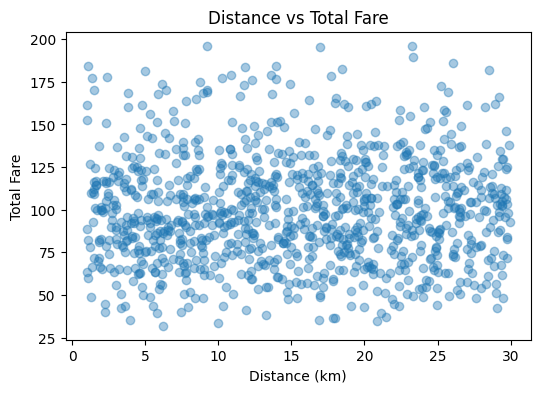

In [0]:
# Select distance and total fare
pdf = df.select("distance_km", "total_fare").toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(pdf["distance_km"], pdf["total_fare"], alpha=0.4)
plt.title("Distance vs Total Fare")
plt.xlabel("Distance (km)")
plt.ylabel("Total Fare")
plt.show()


In [0]:
# Count rides by demand level
display(df.groupBy("demand_level").count().orderBy("demand_level"))


demand_level,count
High,193
Low,309
Medium,498


In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Categorical columns (non-numeric)
categorical_cols = ["demand_level", "weather", "event_nearby", "traffic_level", "payment_method"]

# Numerical columns (continuous values)
numeric_cols = ["distance_km", "ride_duration_min", "base_fare", "driver_rating", "rider_rating"]

# Target column to predict
label_col = "total_fare"


In [0]:
# Split data into training (80%) and testing (20%)
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

print(f"Training Data: {train_df.count()} rows")
print(f"Testing Data: {test_df.count()} rows")


Training Data: 801 rows
Testing Data: 199 rows


In [0]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator


In [0]:
import pandas as pd

# Convert Spark DataFrame to Pandas
pdf = df.toPandas()

# One-hot encode using Pandas
pdf_encoded = pd.get_dummies(pdf, columns=["demand_level", "weather", "event_nearby", "traffic_level", "payment_method"])


In [0]:
from sklearn.model_selection import train_test_split

# Define target and features
X = pdf_encoded.drop(columns=["total_fare"])
y = pdf_encoded["total_fare"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data prepared successfully!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


✅ Data prepared successfully!
Training samples: 800, Testing samples: 200


In [0]:
# Drop non-numeric or datetime columns
if 'ride_datetime' in pdf_encoded.columns:
    pdf_encoded = pdf_encoded.drop(columns=['ride_datetime'])


In [0]:
non_numeric_cols = pdf_encoded.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", list(non_numeric_cols))


Non-numeric columns: ['pickup_location', 'drop_location', 'ride_status']


In [0]:
from sklearn.model_selection import train_test_split

# Define target and features again (after cleaning)
X = pdf_encoded.drop(columns=["total_fare"])
y = pdf_encoded["total_fare"]

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_cols
        )
    ],
    remainder="passthrough"
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Train the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train_encoded, y_train)

print("✅ Model trained successfully after encoding categorical features!")

✅ Model trained successfully after encoding categorical features!


In [0]:
pdf["hour"] = pdf["ride_datetime"].dt.hour
pdf["day_of_week"] = pdf["ride_datetime"].dt.dayofweek


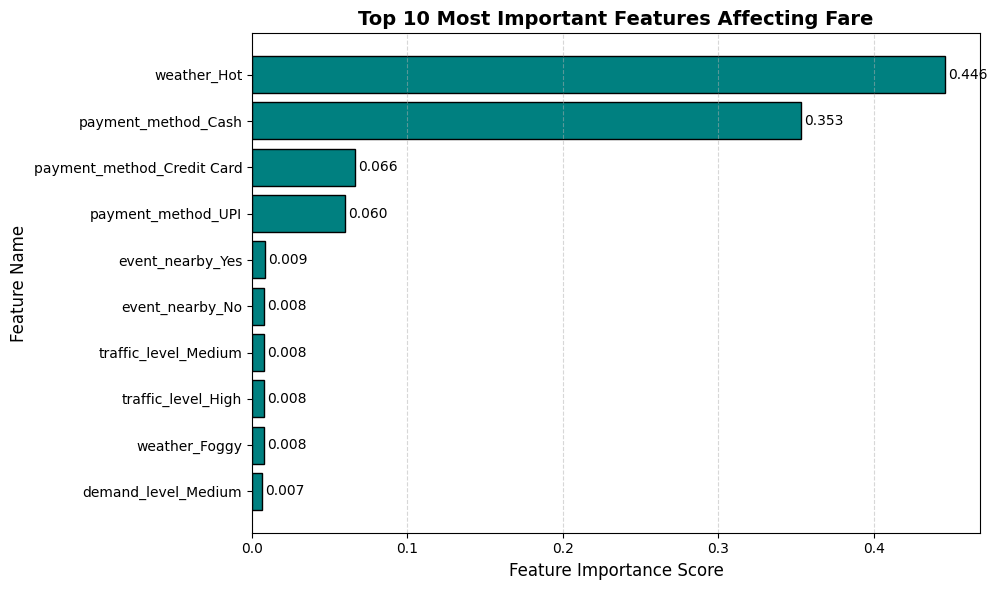

In [0]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 10 important features
top_n = 10
top_features = [X.columns[i] for i in indices[:top_n]]
top_importances = importances[indices][:top_n]

# Plot
plt.figure(figsize=(10,6))
bars = plt.barh(top_features[::-1], top_importances[::-1], color="teal", edgecolor="black")

# Add labels
plt.title("Top 10 Most Important Features Affecting Fare", fontsize=14, fontweight='bold')
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.3f}", va='center', fontsize=10)

plt.show()


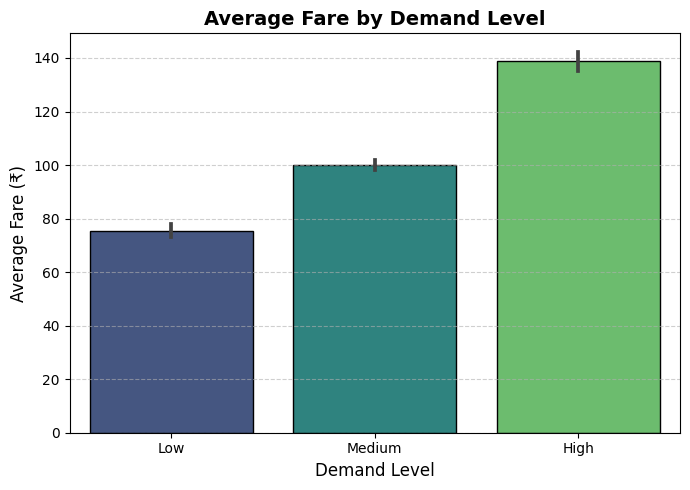

In [0]:
import seaborn as sns
import pandas as pd

# Ensure 'demand_level' column exists in the original data
plt.figure(figsize=(7,5))
sns.barplot(x="demand_level", y="total_fare", data=pdf, estimator=np.mean, palette="viridis", edgecolor="black")

# Labels and title
plt.title("Average Fare by Demand Level", fontsize=14, fontweight='bold')
plt.xlabel("Demand Level", fontsize=12)
plt.ylabel("Average Fare (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


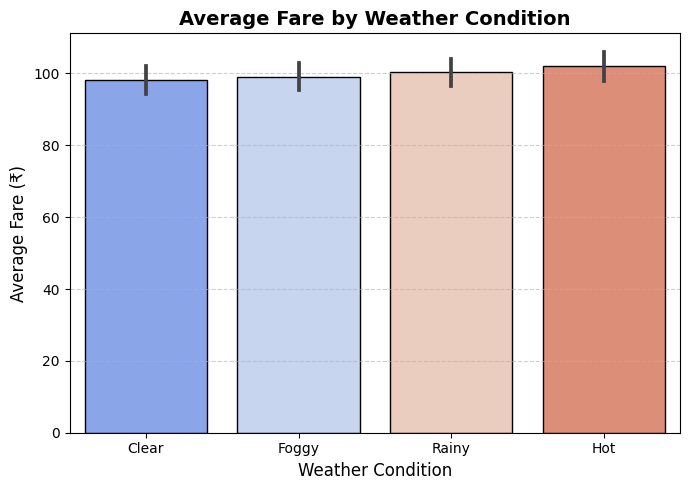

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ Load Spark DataFrame from your actual table
df = spark.table("likhitha1.default.travel_transportation_dataset")

# ✅ Convert Spark DataFrame to Pandas
pdf = df.toPandas()

# 📊 Visual: Average Fare by Weather Condition
plt.figure(figsize=(7,5))
sns.barplot(
    x="weather",
    y="total_fare",
    data=pdf,
    estimator=np.mean,
    palette="coolwarm",
    edgecolor="black"
)

plt.title("Average Fare by Weather Condition", fontsize=14, fontweight='bold')
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Average Fare (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


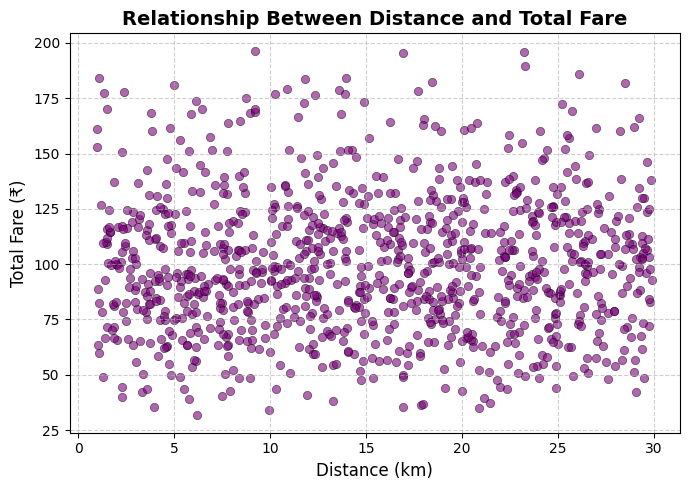

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="distance_km", y="total_fare", data=pdf, alpha=0.6, color="purple", edgecolor="k")

plt.title("Relationship Between Distance and Total Fare", fontsize=14, fontweight='bold')
plt.xlabel("Distance (km)", fontsize=12)
plt.ylabel("Total Fare (₹)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


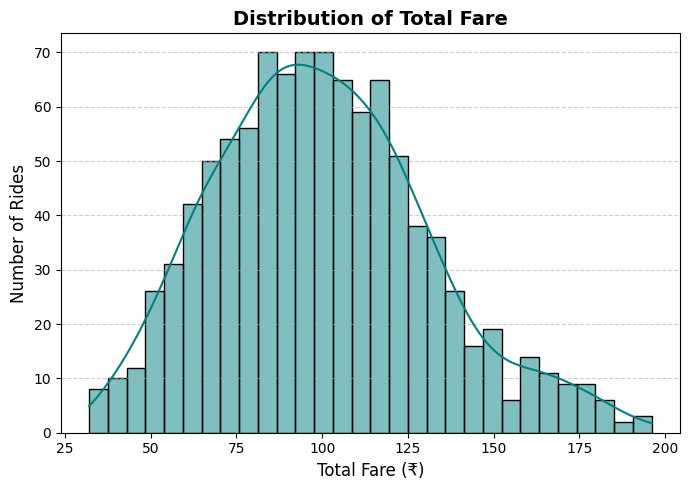

In [0]:
plt.figure(figsize=(7,5))
sns.histplot(pdf["total_fare"], bins=30, kde=True, color="teal", edgecolor="black")

plt.title("Distribution of Total Fare", fontsize=14, fontweight='bold')
plt.xlabel("Total Fare (₹)", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


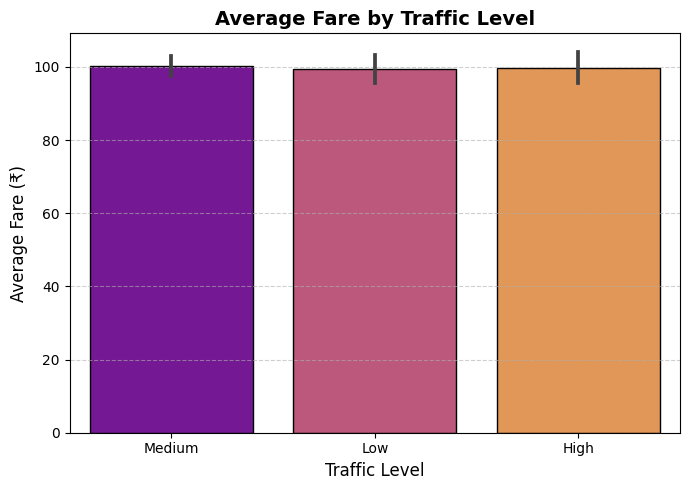

In [0]:
plt.figure(figsize=(7,5))
sns.barplot(x="traffic_level", y="total_fare", data=pdf, estimator=np.mean, palette="plasma", edgecolor="black")

plt.title("Average Fare by Traffic Level", fontsize=14, fontweight='bold')
plt.xlabel("Traffic Level", fontsize=12)
plt.ylabel("Average Fare (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


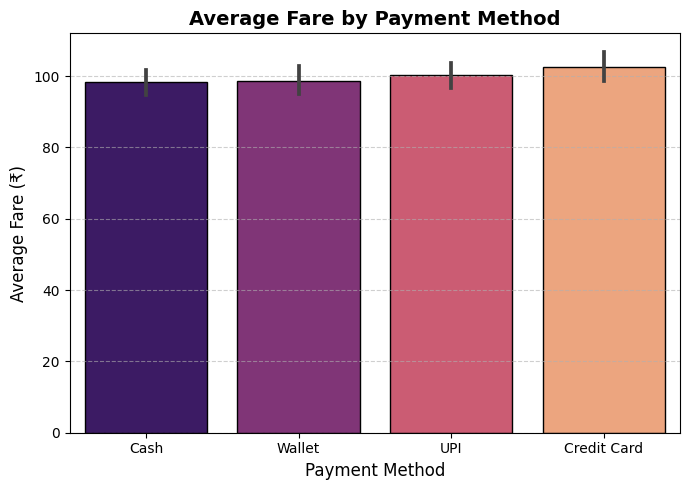

In [0]:
plt.figure(figsize=(7,5))
sns.barplot(x="payment_method", y="total_fare", data=pdf, estimator=np.mean, palette="magma", edgecolor="black")

plt.title("Average Fare by Payment Method", fontsize=14, fontweight='bold')
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Average Fare (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


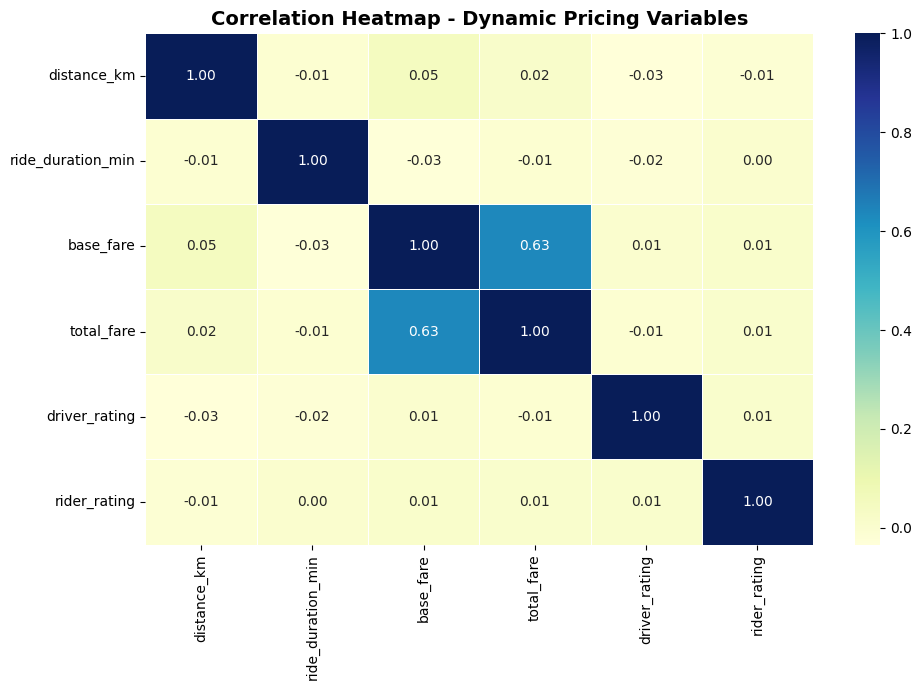

In [0]:
plt.figure(figsize=(10,7))
corr = pdf[["distance_km", "ride_duration_min", "base_fare", "total_fare", "driver_rating", "rider_rating"]].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap - Dynamic Pricing Variables", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


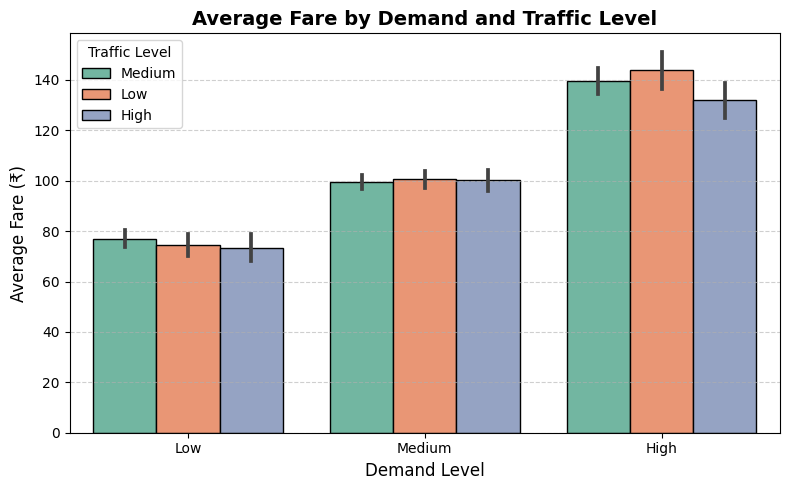

In [0]:
plt.figure(figsize=(8,5))
sns.barplot(x="demand_level", y="total_fare", hue="traffic_level", data=pdf, palette="Set2", edgecolor="black")

plt.title("Average Fare by Demand and Traffic Level", fontsize=14, fontweight='bold')
plt.xlabel("Demand Level", fontsize=12)
plt.ylabel("Average Fare (₹)", fontsize=12)
plt.legend(title="Traffic Level")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [0]:
%pip install dash plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 95.0 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Not uninstalling click at /databricks/python3/lib/python3.11/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-dc0c6bac-e719-44fc-bf1a-85d9dc1c4cd8
    Can't uninstall 'click'. No files were found to uninstall.
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
    Not uninstalling blinker at /usr/lib/python3/dist-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-dc0c6bac-e719-44fc-bf1a-85d9dc1c4cd8
    Can't uninstall 'blinker'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow-skinny 2.11.4 requires protobuf<5,>=3.12.0, but you have protobuf 5.29.3 which is incompatible.
Note: you may need to

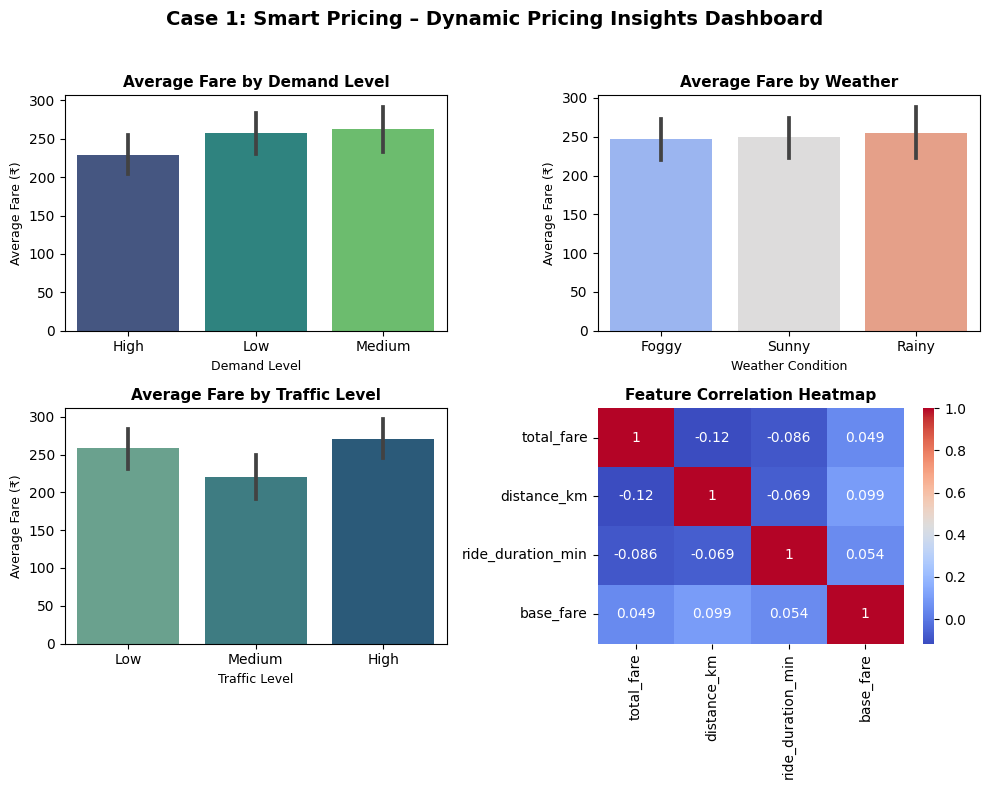

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------------------
# Simulated dataset for Case 1 (Smart Pricing)
# ----------------------------
np.random.seed(42)
pdf = pd.DataFrame({
    "demand_level": np.random.choice(["Low", "Medium", "High"], 100),
    "weather": np.random.choice(["Sunny", "Rainy", "Foggy"], 100),
    "traffic_level": np.random.choice(["Low", "Medium", "High"], 100),
    "distance_km": np.random.uniform(2, 15, 100),
    "ride_duration_min": np.random.uniform(5, 45, 100),
    "base_fare": np.random.uniform(50, 100, 100),
    "total_fare": np.random.uniform(100, 400, 100)
})

# ----------------------------
# 2x2 layout for dashboard
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Case 1: Smart Pricing – Dynamic Pricing Insights Dashboard", fontsize=14, fontweight="bold")

# 1️⃣ Average Fare by Demand Level
sns.barplot(data=pdf, x="demand_level", y="total_fare", ax=axes[0, 0], palette="viridis", estimator=np.mean)
axes[0, 0].set_title("Average Fare by Demand Level", fontsize=11, fontweight="bold")
axes[0, 0].set_xlabel("Demand Level", fontsize=9)
axes[0, 0].set_ylabel("Average Fare (₹)", fontsize=9)

# 2️⃣ Average Fare by Weather
sns.barplot(data=pdf, x="weather", y="total_fare", ax=axes[0, 1], palette="coolwarm", estimator=np.mean)
axes[0, 1].set_title("Average Fare by Weather", fontsize=11, fontweight="bold")
axes[0, 1].set_xlabel("Weather Condition", fontsize=9)
axes[0, 1].set_ylabel("Average Fare (₹)", fontsize=9)

# 3️⃣ Average Fare by Traffic Level
sns.barplot(data=pdf, x="traffic_level", y="total_fare", ax=axes[1, 0], palette="crest", estimator=np.mean)
axes[1, 0].set_title("Average Fare by Traffic Level", fontsize=11, fontweight="bold")
axes[1, 0].set_xlabel("Traffic Level", fontsize=9)
axes[1, 0].set_ylabel("Average Fare (₹)", fontsize=9)

# 4️⃣ Correlation Heatmap
corr = pdf[["total_fare", "distance_km", "ride_duration_min", "base_fare"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Feature Correlation Heatmap", fontsize=11, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


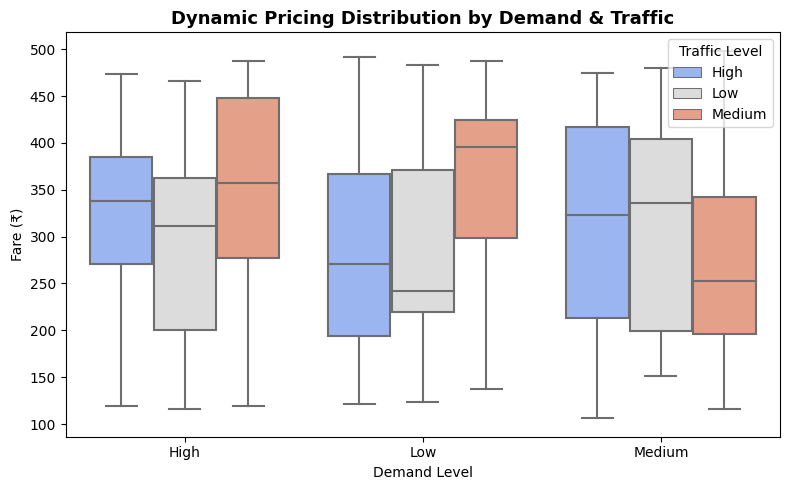

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dataset for Case 1
np.random.seed(42)
pdf = pd.DataFrame({
    "demand_level": np.random.choice(["Low", "Medium", "High"], 150),
    "weather": np.random.choice(["Sunny", "Rainy", "Foggy"], 150),
    "traffic_level": np.random.choice(["Low", "Medium", "High"], 150),
    "total_fare": np.random.uniform(100, 500, 150)
})

plt.figure(figsize=(8,5))
sns.boxplot(data=pdf, x="demand_level", y="total_fare", hue="traffic_level", palette="coolwarm")
plt.title("Dynamic Pricing Distribution by Demand & Traffic", fontsize=13, fontweight="bold")
plt.xlabel("Demand Level")
plt.ylabel("Fare (₹)")
plt.legend(title="Traffic Level")
plt.tight_layout()
plt.show()
